# Marketing campaign planning for 2017

Background of the project

* To plan for marketing budget for 2017

Objective of the project.

* To identify how should we allocate marketing budget based on platforms and genres for different regions. 

Plans and stages you want to carry out in the project.

1. Study the data to see if we have any missing data and why
2. Fill the missing values if necessary
3. Calculate global sales so we can rank games easily 
4. Extract data from last 3 years to forecast sales for 2017
5. Test if there is relationship between critic scores and sales 
6. Regional analysis to look deeper into the relationship between sales, genre, platforms and rating
6. Formulate hypotheses and test


<div class="alert alert-block alert-warning">
<b></b> <a class="tocSkip"></a>   
    
> # Contents <a id='back'></a>
> * [Introduction](#intro)
    * [Stage 1. Importing libraries](#Import-Libraries)
    * [Stage 2. Load data](#Load-data)
    * [Stage 3. Data overview and preparation](#Data-overview)
        * [3.1 Renamaing columns to lower case ](#Renamaing-columns-to-lower-case )
        * [3.2 Updating data type for year_of_release](#Updating-data-type-for-year_of_release)
        * [3.3 Missing values for genre and name](#Missing-values-for-genre-and-name)
        * [3.4 Missing values for critic scores](#Missing-values-for-critic-scores)
        * [3.5 Missing values for rating](#Missing-values-for-rating)
        * [3.6 Missing values for user score](#Missing-values-for-user-score)
        * [3.7 Adding total_sales](#Adding-total-sales ) 
    * [Stage 4. Analyzing data](#Analyzing-data)
        * [4.1 Games release per year](#Games-release-per-year)
        * [4.2 Sales per platform](#Sales-per-platform)
        * [4.3 Filtering out data to build model](#Filtering-out-data-to-build-model)
        * [4.4 Global sales per platform](#Global-sales-per-platform)
        * [4.5 How critic score affect sales for PS4](#How-critic-score-affect-sales-for-PS4)
        * [4.6 Games by genre](#Games-by-genre)
    * [Stage 5. Region analysis ](#Region-analysis)
        * [5.1 Top 5 platforms regional market share](#Top-5-platforms-regional-market-share)
        * [5.2 Top 5 genre per region](#Top-5-genre-per-region)
        * [5.3 ESRB rating and sales per region](#ESRB-rating-and-sales-per-region)
    * [Stage 6. Testing the hypotheses](#Test-statistical-hypotheses)
    * [General conclusion](#General-conclusion)

# Import Libraries

In [1]:

import pandas as pd
from scipy import stats as st
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
try:
    games = pd.read_csv('/Users/dankeichow/Documents/Practicum/Project/Working/games.csv')

except:
    games = pd.read_csv('/datasets/games.csv')

# Data overview

In [3]:
#familiarise with the data
games.info()
games.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Missing data in terms of %

missing_percentage = games.isna().sum() / games.shape[0] *100
missing_percentage.sort_values(ascending=False)

Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Name                0.011965
Genre               0.011965
Platform            0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
dtype: float64

In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


At a quick glance, `critic_score` is missing over 50% of its value. `rating` and `user_score` are missing 40% of data. Will further investigate to decide how do we fill the missing values.

The data has columns with capital letter and it also has incorrect data type for some columns. 

We will have to:
1. Update column name with lower case
2. Update data type

Column(s) will have to change data type:
1. `year_of_release` > datetime


There are also missing values in `name` , `year_of_release`, `genre`, `critic score`, `user_score`, `rating`

# Renamaing columns to lower case 

In [6]:
#Replace the column names (make them lowercase)

games.columns = games.columns.str.lower()

games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
#Check if there is duplicates in the data
print(games.duplicated().sum())


0


# Updating data type for year_of_release

1. There are missing values in the column. We are missing 269 rows of years
2. I will drop the missing rows as there are only 1.6% of missing year of all data
3. Convert to datetime

In [8]:
#removing NA
games = games.dropna(subset=['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype(int)

In [9]:
#converting to datetime with just the year

games['year_of_release'] = pd.to_datetime(games.year_of_release, format='%Y').dt.year


In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


# Missing values for genre and name

In [11]:
# Checking missing value for genre column
games.loc[games['name'].isnull() & games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There are only 2 rows of missing genre and name. Not only do they miss the genre and name, they are missing critic score, user score and rating. Since 2 rows of missing genre is insignificant. I will be dropping these 2 rows

In [12]:
games = games.dropna(subset=['genre','name'])

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


# Missing values for critic scores

Trying to understanding why there are missing values in `critic_score` column and if they are missing random

In [14]:
#Create non-null and null data based on critic_score column
critic_not_null = games.loc[games['critic_score'].notnull()]
critic_null = games.loc[games['critic_score'].isnull()]

In [15]:
#Compare critic_score column with platform

critic_not_null['platform'].value_counts(normalize=True)

platform
PS2     0.159714
X360    0.111988
PS3     0.100714
DS      0.088688
XB      0.088438
PC      0.087561
Wii     0.071151
PSP     0.057121
GC      0.054741
GBA     0.053864
PS4     0.031567
PS      0.024552
XOne    0.021170
3DS     0.020794
PSV     0.014907
WiiU    0.011274
DC      0.001754
Name: proportion, dtype: float64

In [16]:
critic_null['platform'].value_counts(normalize=True)

platform
DS      0.167002
PS      0.117480
PS2     0.100697
PSP     0.087106
Wii     0.084860
PS3     0.059331
GBA     0.045030
3DS     0.040894
X360    0.039948
N64     0.037348
PSV     0.036639
PC      0.030493
SNES    0.028247
SAT     0.020447
PS4     0.016547
2600    0.013710
GC      0.012410
NES     0.011583
GB      0.011464
XB      0.011464
XOne    0.009219
WiiU    0.006737
DC      0.004491
GEN     0.003191
NG      0.001418
SCD     0.000709
WS      0.000709
3DO     0.000355
TG16    0.000236
GG      0.000118
PCFX    0.000118
Name: proportion, dtype: float64

In [17]:
critic_not_null['year_of_release'].value_counts(normalize=True)

year_of_release
2008    0.089565
2007    0.086684
2005    0.082049
2009    0.081548
2002    0.078542
2006    0.077665
2003    0.073281
2004    0.070274
2010    0.062633
2011    0.062633
2001    0.040837
2012    0.040210
2013    0.034198
2014    0.032694
2016    0.029062
2015    0.028185
2000    0.017913
1999    0.004885
1998    0.003507
1997    0.002130
1996    0.001002
1994    0.000125
1985    0.000125
1992    0.000125
1988    0.000125
Name: proportion, dtype: float64

In [18]:
critic_null['year_of_release'].value_counts(normalize=True)

year_of_release
2009    0.091597
2010    0.089233
2008    0.084151
2011    0.075168
2007    0.059686
2006    0.045621
2015    0.045030
1998    0.041484
2012    0.039239
2014    0.037821
1999    0.035339
2005    0.033566
1997    0.032148
2013    0.032029
2016    0.031911
1996    0.030138
1995    0.025883
2000    0.024465
2002    0.023874
2004    0.023756
2003    0.022456
2001    0.018438
1994    0.014183
1993    0.007091
1981    0.005437
1992    0.004964
1991    0.004846
1982    0.004255
1986    0.002482
1983    0.002009
1989    0.002009
1990    0.001891
1987    0.001891
1988    0.001655
1984    0.001655
1985    0.001536
1980    0.001064
Name: proportion, dtype: float64

In [19]:
critic_null['genre'].value_counts(normalize=True)

genre
Action          0.172084
Misc            0.143245
Sports          0.134854
Adventure       0.114998
Role-Playing    0.088642
Simulation      0.060158
Racing          0.059213
Fighting        0.051058
Platform        0.045857
Strategy        0.044557
Shooter         0.044085
Puzzle          0.041248
Name: proportion, dtype: float64

In [20]:
critic_not_null['genre'].value_counts(normalize=True)

genre
Action          0.231868
Sports          0.145935
Shooter         0.115621
Role-Playing    0.091570
Racing          0.090818
Misc            0.063760
Platform        0.061380
Fighting        0.050733
Simulation      0.043593
Adventure       0.040085
Strategy        0.037079
Puzzle          0.027559
Name: proportion, dtype: float64

The observation for missing values on `critic_score` is that there does not seem to have a pattern of a specific year or platform that the data is missing. Maybe it is not a popular game that it does not have any reviews on them? Since 50% of `critic_score` is missing, I will fill it in with -1 for now and decide later.

In [21]:
#filling in a value, -1, for now 

games['critic_score'] = games['critic_score'].fillna(-1)

In [22]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


# Missing values for rating


In [23]:
#Create non-null and null data based on rating column
rating_not_null = games.loc[games['rating'].notnull()]
rating_null = games.loc[games['rating'].isnull()]

In [24]:
rating_not_null['year_of_release'].value_counts(normalize=True)

year_of_release
2009    0.103501
2008    0.100430
2007    0.084050
2010    0.081798
2005    0.072277
2011    0.071970
2006    0.069410
2002    0.067056
2003    0.062756
2004    0.061220
2012    0.036343
2014    0.035319
2001    0.034705
2013    0.032351
2015    0.032248
2016    0.028665
2000    0.015152
1999    0.004300
1998    0.003276
1997    0.001945
1996    0.000717
1992    0.000205
1994    0.000102
1985    0.000102
1988    0.000102
Name: proportion, dtype: float64

In [25]:
rating_null['year_of_release'].value_counts(normalize=True)

year_of_release
2010    0.068304
2008    0.066806
2011    0.064859
2009    0.062163
2007    0.056321
1998    0.051977
2006    0.049131
2012    0.044638
1999    0.044338
2015    0.043589
1997    0.040443
1996    0.038346
2014    0.035351
2005    0.034901
2013    0.034152
2016    0.033253
1995    0.032804
2000    0.030258
2002    0.026064
2004    0.024566
2003    0.024266
2001    0.021420
1994    0.017975
1993    0.008987
1981    0.006890
1992    0.006141
1991    0.006141
1982    0.005392
1986    0.003146
1983    0.002546
1989    0.002546
1990    0.002397
1987    0.002397
1988    0.002097
1984    0.002097
1985    0.001947
1980    0.001348
Name: proportion, dtype: float64

In [26]:
rating_not_null['platform'].value_counts(normalize=True)

platform
PS2     0.149058
DS      0.128481
X360    0.105446
Wii     0.100020
PS3     0.095721
PC      0.077498
XB      0.073096
PSP     0.054873
GBA     0.052621
GC      0.046785
PS4     0.026106
3DS     0.022830
PS      0.020885
XOne    0.019042
PSV     0.015356
WiiU    0.010749
DC      0.001433
Name: proportion, dtype: float64

In [27]:
rating_null['platform'].value_counts(normalize=True)

platform
PS      0.147693
DS      0.129718
PS2     0.100509
PSP     0.098412
PS3     0.055572
N64     0.047334
Wii     0.046285
GBA     0.044488
3DS     0.043289
PSV     0.041791
SNES    0.035800
X360    0.030258
PC      0.029958
SAT     0.025914
PS4     0.020521
2600    0.017376
NES     0.014679
GB      0.014530
XB      0.013331
GC      0.012732
XOne    0.009137
WiiU    0.006291
DC      0.005692
GEN     0.004044
NG      0.001797
SCD     0.000899
WS      0.000899
3DO     0.000449
TG16    0.000300
GG      0.000150
PCFX    0.000150
Name: proportion, dtype: float64

I cannot find specific pattern as to why `rating` is missing after comparing to `year_of_release` or `platform` Therefore, I will fill the missing values with -1 first. The rating is missing maybe The Entertainment Software Rating Board has yet to evaluate a game's content and assign an age rating.

In [28]:
#filling the missing value with -1

games['rating'] = games['rating'].fillna('Unknown')

In [29]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


# Missing values for user score

In [30]:
games['user_score'].value_counts(dropna=False)

user_score
NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.9       2
9.6       2
0.9       2
0         1
9.7       1
Name: count, Length: 97, dtype: int64

In [31]:
#Create non-null and null data based on user_score column
user_score_not_null = games[games['user_score'].notnull()]
user_score_null = games[games['user_score'].isnull()]

In [32]:
user_score_not_null['platform'].value_counts(normalize=True)

platform
PS2     0.147983
DS      0.127655
X360    0.104482
Wii     0.099197
PS3     0.096351
PC      0.081716
XB      0.072873
PSP     0.054477
GBA     0.051733
GC      0.046448
PS4     0.026730
3DS     0.022868
PS      0.020632
XOne    0.019616
PSV     0.015144
WiiU    0.010672
DC      0.001423
Name: proportion, dtype: float64

In [33]:
user_score_null['platform'].value_counts(normalize=True)

platform
PS      0.149432
DS      0.130961
PS2     0.101590
PSP     0.099470
PS3     0.054201
N64     0.047843
Wii     0.046934
GBA     0.045723
3DS     0.043452
PSV     0.042392
SNES    0.036185
X360    0.030886
SAT     0.026192
PC      0.023164
PS4     0.019531
2600    0.017562
NES     0.014837
GB      0.014686
XB      0.013020
GC      0.012869
XOne    0.008176
WiiU    0.006359
DC      0.005753
GEN     0.004088
NG      0.001817
SCD     0.000908
WS      0.000908
3DO     0.000454
TG16    0.000303
GG      0.000151
PCFX    0.000151
Name: proportion, dtype: float64

In [34]:
user_score_not_null['genre'].value_counts(normalize=True)

genre
Action          0.219941
Sports          0.151133
Shooter         0.101636
Misc            0.088322
Racing          0.087204
Role-Playing    0.077955
Simulation      0.058136
Platform        0.056815
Adventure       0.046143
Fighting        0.043907
Strategy        0.034963
Puzzle          0.033845
Name: proportion, dtype: float64

In [35]:
user_score_null['genre'].value_counts(normalize=True)

genre
Action          0.173051
Misc            0.128993
Adventure       0.127025
Sports          0.123997
Role-Playing    0.108100
Fighting        0.061317
Racing          0.055715
Strategy        0.049811
Platform        0.048297
Shooter         0.044815
Simulation      0.043149
Puzzle          0.035731
Name: proportion, dtype: float64

It seems like user_score is missing by random. Less likely that there was human error involved. However, there are 2424 users filled in tbd for score. Maybe the users are yet to complete the game to provide a score. I will fill the missing value with -1 again and leave tbd as it is for now.

In [36]:
#filling the missing value with -1 

games['user_score'] = games['user_score'].fillna(-1)

# tbd also means that there is no user score yet. Therefore, will treat it as missing value and replace with -1
games.loc[games['user_score'] == 'tbd', 'user_score'] = -1

In [37]:
games['user_score'].value_counts()

user_score
-1     8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
0.3       2
1.1       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [38]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


There is no more missing values in games. We will create an additional column for all sales

# Adding total sales 

In [39]:
#Creating total_sales column to calculate sales in all regions 

games['total_sales']=games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1,Unknown,0.01


In [40]:
# rearranging the order of columns so `total_sales` follows the other sales columns

new_order = ['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','total_sales','critic_score','user_score','rating']
games = games[new_order]
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,-1.0,-1,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,-1.0,-1,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,-1.0,-1,Unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,-1.0,-1,Unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,-1.0,-1,Unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,-1.0,-1,Unknown


<b>Observation</b>

I see there are quite a lot of `total_sales` below 1. Will try to
1. Create 2 datasets. Filter out and see how many rows of data have less than $1 sales and how many greater than 1

2. See if sales smaller than $1, how much of the data is also missing `critic_score`, `user_score` and `rating` VS sales greater than 1

Would like to see if `critic_score`, `user_score` and `rating` are missing because there are very few sales hence there is no review.

In [41]:
small_sales = games.query('total_sales < 0.99')

small_sales_row = small_sales.shape [0]

print(f'There are {small_sales_row} rows with sales below $1.')

There are 14373 rows with sales below $1.


In [42]:
missing_values = small_sales.loc[(small_sales['critic_score']==-1) & (small_sales['rating']=='Unknown') & (small_sales['user_score'] == -1)]

missing_values_rows = missing_values.shape[0]

missing_values_percentage = missing_values_rows / small_sales_row


print(f'''There are {missing_values_rows} rows missing critic_score, rating, and user_score. 
In another words, {missing_values_percentage:.2%} of data with sales less than $1. is missing data for these 3 columns. ''')

There are 5944 rows missing critic_score, rating, and user_score. 
In another words, 41.36% of data with sales less than $1. is missing data for these 3 columns. 


In [43]:
sales_greater_1 = games.query('total_sales >1')
sales_greater_1_row = sales_greater_1.shape [0]
print(f'There are {sales_greater_1_row} rows with sales greater $1.')

There are 2038 rows with sales greater $1.


In [44]:
sales_greater_1_missing = sales_greater_1.loc[(sales_greater_1['critic_score']==-1) & (sales_greater_1['rating']=='Unknown') & (sales_greater_1['user_score'] == -1)]

sales_greater_1_missing_rows = sales_greater_1_missing.shape[0]

sales_greater_1_missing_percentage = sales_greater_1_missing_rows / sales_greater_1_row

print(f'''There are {sales_greater_1_missing_rows} rows missing critic_score, rating, and user_score. 
In another words, {sales_greater_1_missing_percentage:.2%} of data with sales greater than $1. is missing data for these 3 columns. ''')

There are 625 rows missing critic_score, rating, and user_score. 
In another words, 30.67% of data with sales greater than $1. is missing data for these 3 columns. 


It seems like whether sales greater than $1 or smaller than 1 there is still majority of the data 41% vs 31% missing `critic_score`, `user_score` and `rating`. Therefore, it seems like data are just missing by random

# Analyzing data

# Games release per year

There are 30+ years of data. Will group them by decade to get a high level sense of which period has more games released.

In [45]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   total_sales      16444 non-null  float64
 9   critic_score     16444 non-null  float64
 10  user_score       16444 non-null  object 
 11  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(5)
memory usage: 1.6+ MB


In [46]:
#To look at distribution of games released in different years
games['year_of_release'].value_counts()

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

In [47]:
# assigning different period 

def decade(year):
    if 1980 < year < 1990:
        return "80s"
    elif 1990 < year < 2000:
        return "90s"
    elif 2000 < year < 2010:
        return "00s"
    elif 2010 < year:
        return "10s"
        

In [48]:
games['decade'] = games['year_of_release'].apply(decade)

/var/folders/z9/jhcp9q952p53t5slsqgg6gmc0000gn/T/ipykernel_9983/4254449422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['decade'] = games['year_of_release'].apply(decade)


In [49]:
games['decade'].value_counts(normalize=True)

decade
00s    0.596935
10s    0.271500
90s    0.118334
80s    0.013231
Name: proportion, dtype: float64

In [50]:
years_sorted = games['year_of_release'].value_counts().sort_index(ascending=True)
years_sorted

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: int64

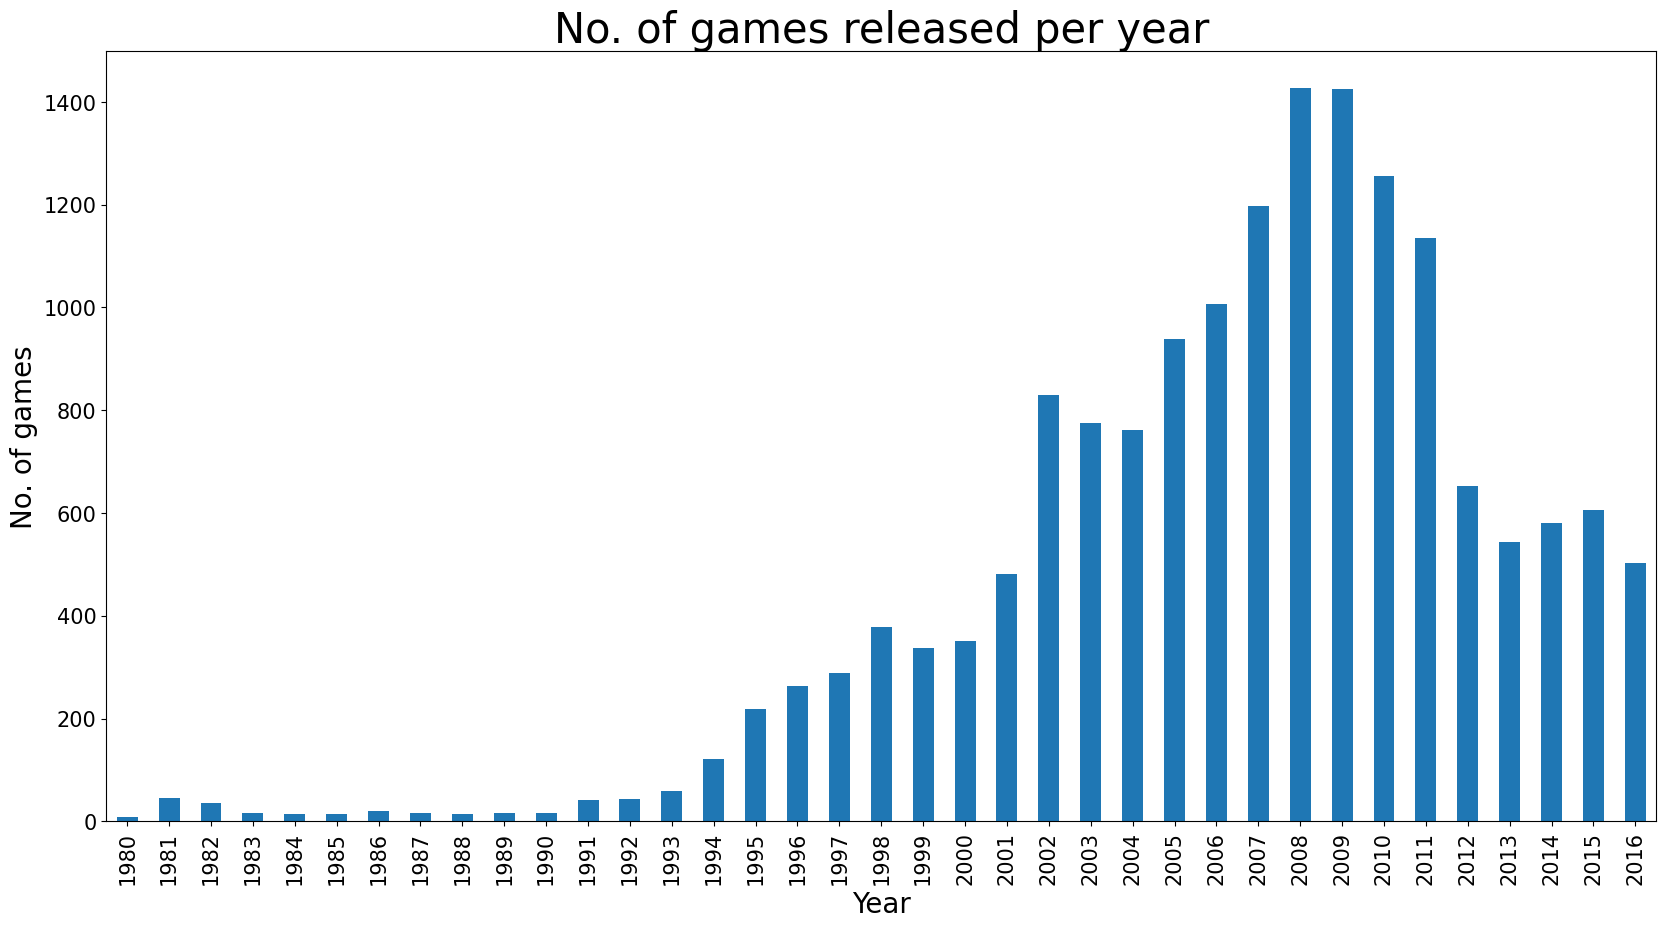

In [51]:
# creating a bar chart to showcase the number of games release per year

years_sorted.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title('No. of games released per year', fontsize='30')
plt.ylabel('No. of games',fontsize='20')
plt.xlabel('Year', fontsize='20')
plt.yticks(fontsize='15')
plt.xticks(fontsize='15')
plt.show()

Around 60% of games were release in the 2000s. Games released in 2010s are half the number of 2000s. One thing to note is that the data is up till 2016 so there are 4 years missing in 2010s 

# Sales per platform

Creating a pivot table to get sales per platform per decade to identify which platform has greatest sales. Will then look at the distribution of `year_of_release` for the most popular platform

In [52]:
# Creating a pivot table to evaluate which platform is the most popular. 

sales_per_platform = games.pivot_table(index='platform', columns='decade', values='total_sales', aggfunc='sum')

In [53]:
new_decade_order = ['80s','90s','00s','10s']
sales_per_platform = sales_per_platform[new_decade_order]

In [54]:
sales_per_platform['total'] = sales_per_platform.sum(axis=1, skipna=True)
sales_per_platform_sorted = sales_per_platform.sort_values(by='total',ascending=False)
sales_per_platform_sorted

decade,80s,90s,00s,10s,total
platform,,,,,
PS2,NaN,NaN,1188.30,0.45,1188.75
X360,NaN,NaN,410.83,380.38,791.21
PS3,NaN,NaN,343.60,445.57,789.17
Wii,NaN,NaN,668.21,95.02,763.23
DS,0.02,NaN,679.01,38.73,717.76
PS,NaN,586.88,44.33,NaN,631.21
PS4,NaN,NaN,NaN,314.14,314.14
GBA,NaN,NaN,312.81,NaN,312.81
3DS,NaN,NaN,NaN,257.81,257.81


In [55]:
games_platform_popular = games.query('platform =="PS2"')
games_platform_popular['year_of_release'].value_counts()

year_of_release
2002    280
2005    260
2004    259
2006    259
2003    256
2007    214
2008    191
2001    185
2009     96
2000     82
2010     38
2011      7
Name: count, dtype: int64

In [56]:
#sns.displot(data=games_platform_popular, x="year_of_release",hue='platform', multiple='stack')
#plt.title('Distribution of Most Popular Platforms - PS2')
#plt.xlabel('Years',fontsize=12)
#plt.show()

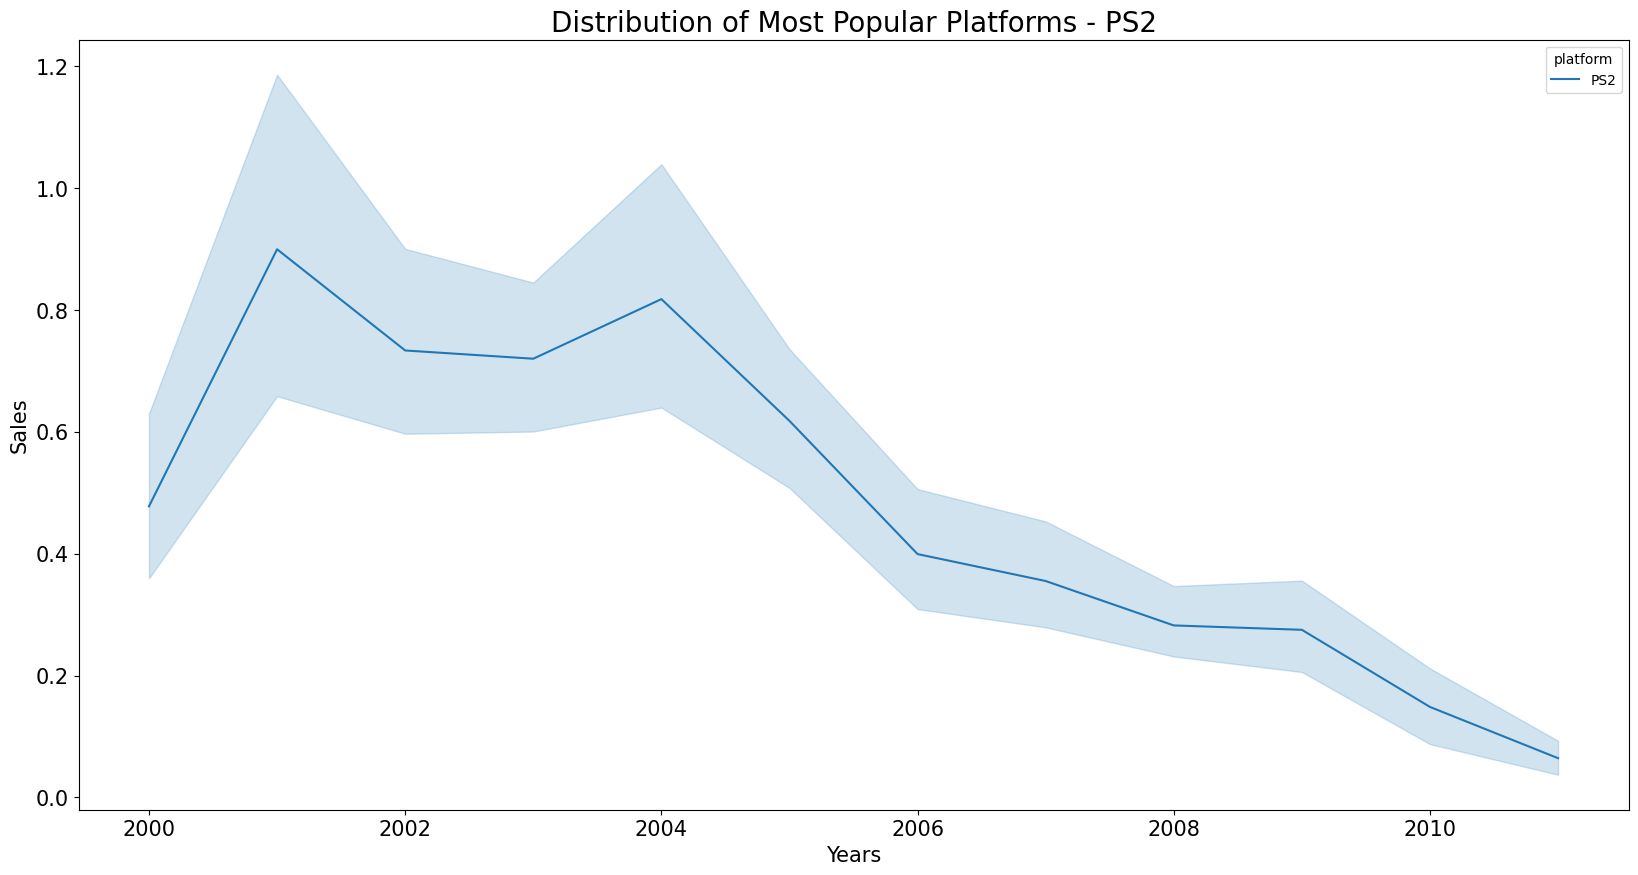

In [57]:
sns.lineplot(data=games_platform_popular, x='year_of_release', y='total_sales',hue='platform')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title('Distribution of Most Popular Platforms - PS2', fontsize=20)
plt.ylabel('Sales', fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

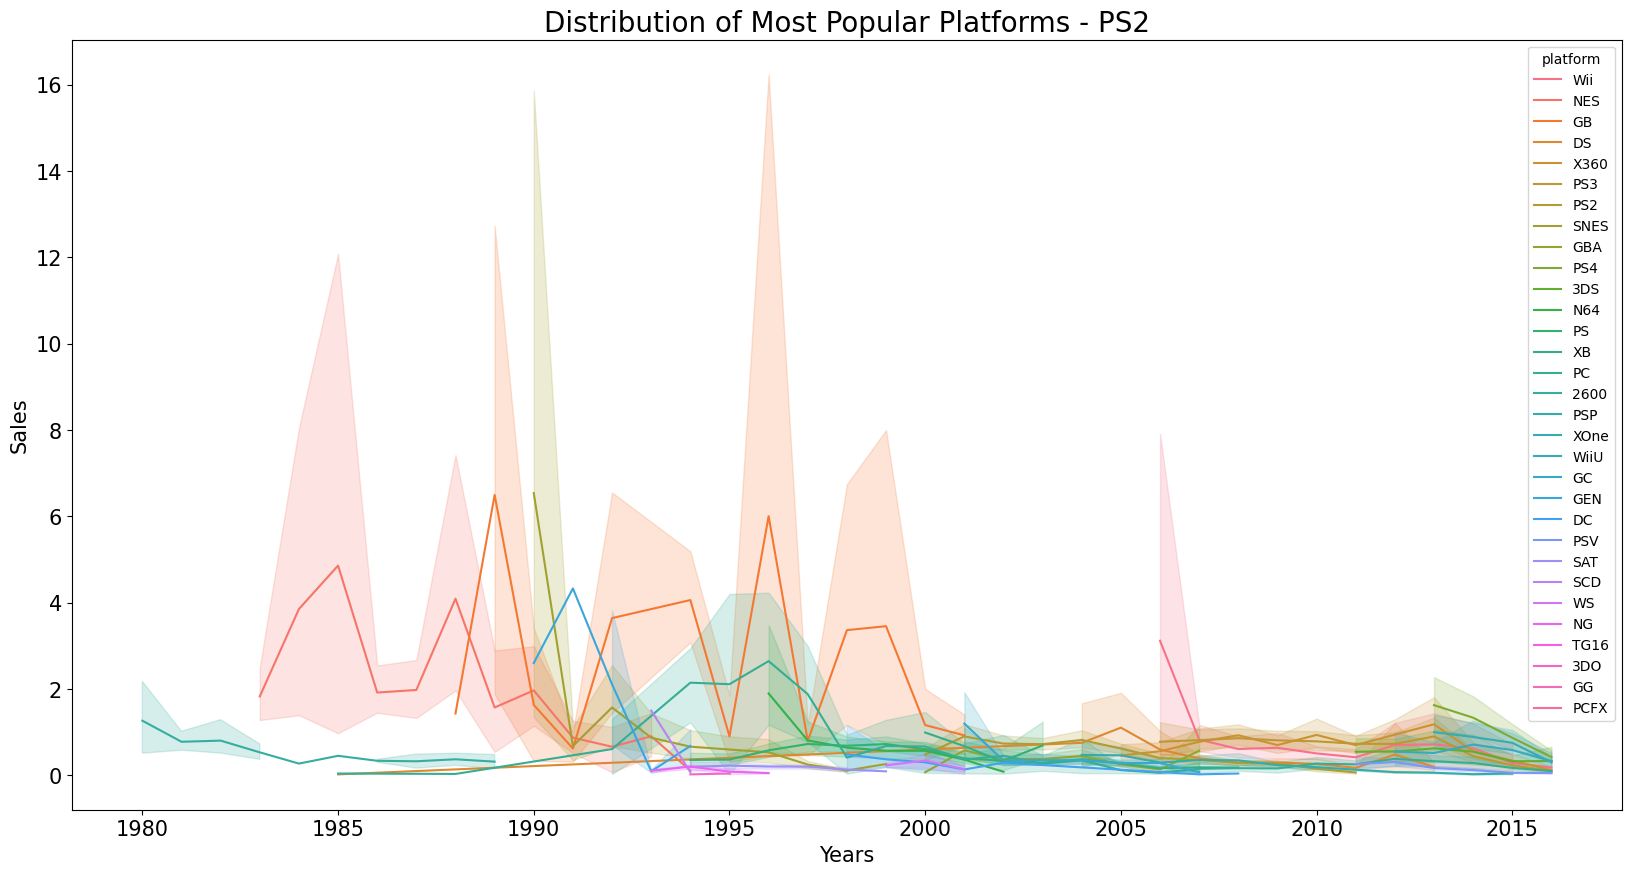

In [58]:
sns.lineplot(data=games, x='year_of_release', y='total_sales',hue='platform')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title('Distribution of Most Popular Platforms - PS2', fontsize=20)
plt.ylabel('Sales', fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

<b>Observation</b>

A lot of the platforms last for 2 decades and start to fade. The exception is PC. PC have games releasing since the 80s until 2010s. Based on the year distribution of PS2, platform with most sales, games were released between 2000s to 2010s. In addition, the top 10 platforms with greatest sales also have data spread across 2000s to 2010s. Therefore, I will extract data from 2000s to 2010s to build my model for 2017.

# Filtering out data to build model

In [59]:
games = games.query('year_of_release > 2013')


In [60]:
sales_per_platform = games.pivot_table(index='platform',columns='year_of_release',values='total_sales', aggfunc='sum')

sales_per_platform['total'] = sales_per_platform.sum(axis=1, skipna=True)

In [61]:
sales_per_platform.sort_values(by='total',ascending=False)

year_of_release,2014,2015,2016,total
platform,,,,
PS4,100.00,118.90,69.25,288.15
XOne,54.07,60.14,26.15,140.36
3DS,43.76,27.78,15.14,86.68
PS3,47.76,16.82,3.60,68.18
X360,34.74,11.96,1.52,48.22
WiiU,22.03,16.35,4.60,42.98
PC,13.28,8.52,5.25,27.05
PSV,11.90,6.25,4.25,22.40
Wii,3.75,1.14,0.18,5.07


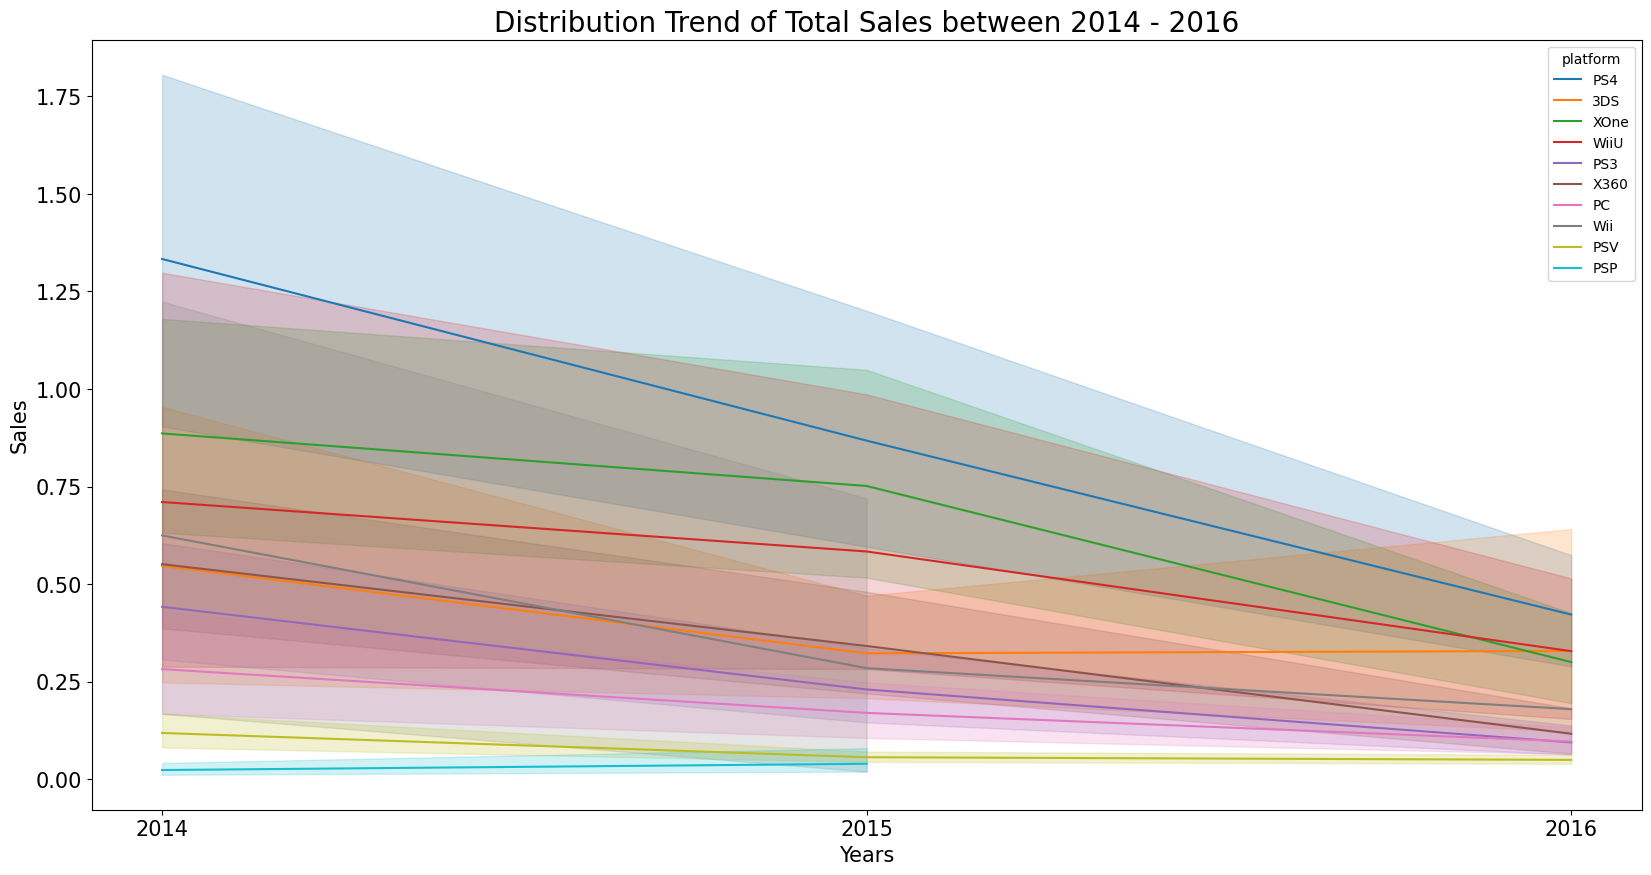

In [62]:
sns.lineplot(data=games, x='year_of_release', y='total_sales', hue='platform')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title('Distribution Trend of Total Sales between 2014 - 2016', fontsize=20)
plt.ylabel('Sales', fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.yticks(fontsize=15)
x_ticks = range(games['year_of_release'].min(), games['year_of_release'].max() + 1)
plt.xticks(x_ticks, fontsize=15)
plt.show()


<b>Observation</b>

At a quick glance, all platform sales are shrinking.

The most profitable platforms are:
- PS4
- XOne
- 3DS



# Global sales per platform

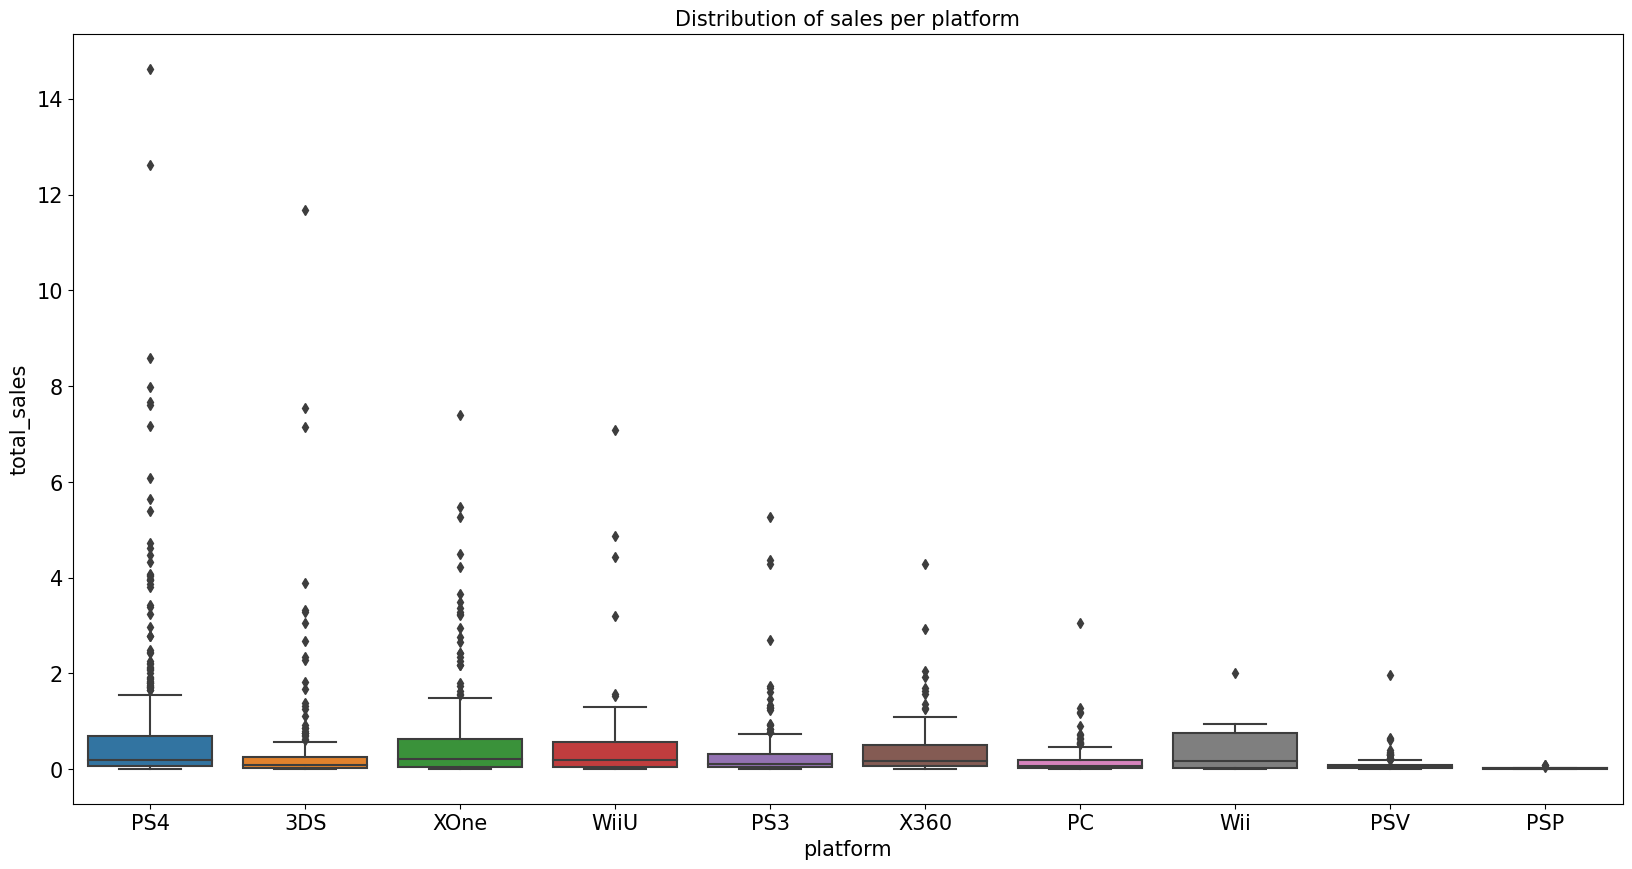

In [63]:

sns.boxplot(x='platform',y='total_sales',data = games)
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title('Distribution of sales per platform',fontsize=15)
plt.ylabel('total_sales', fontsize=15)
plt.xlabel('platform',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.ylim(bottom=0, top=games['total_sales'].quantile(0.99))
plt.show()

<b>Observation</b>   

The average sales of games are around $0.2 million across platform. There are more outliers from PS2. 

The average sales are slightly higher from XOne, X360 and WiiU. However, they do not have as much sales as PS4 or 3DS where their average sales are lower. 

This suggests that the potential of games sales in PS4 and 3DS can bring in higher revenue. 

# How critic score affect sales for PS4

In [64]:
#Extracting Wii data
ps4_sales = games.query('platform =="PS4"')
ps4_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,decade
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,-1.0,-1,Unknown,10s
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M,10s
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E,10s
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.98,-1.0,-1,Unknown,10s
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,7.66,83.0,5.7,M,10s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,0.01,69.0,7.5,Unknown,10s
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,0.01,-1.0,-1,Unknown,10s
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,0.01,61.0,7.9,T,10s
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,0.01,51.0,5.5,M,10s


In [65]:
ps4_sales.sort_values(by='total_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,decade
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,-1.0,-1,Unknown,10s
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M,10s
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E,10s
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.98,-1.0,-1,Unknown,10s
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,7.66,83.0,5.7,M,10s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15943,Professional Farmer 2016,PS4,2015,Action,0.00,0.01,0.00,0.00,0.01,-1.0,-1,Unknown,10s
15864,Rocksmith 2014 Edition Remastered,PS4,2016,Misc,0.01,0.00,0.00,0.00,0.01,-1.0,7.8,T,10s
15839,Mark McMorris Infinite Air,PS4,2016,Sports,0.01,0.00,0.00,0.00,0.01,49.0,6,T,10s
15790,This War of Mine,PS4,2016,Action,0.00,0.01,0.00,0.00,0.01,-1.0,-1,Unknown,10s


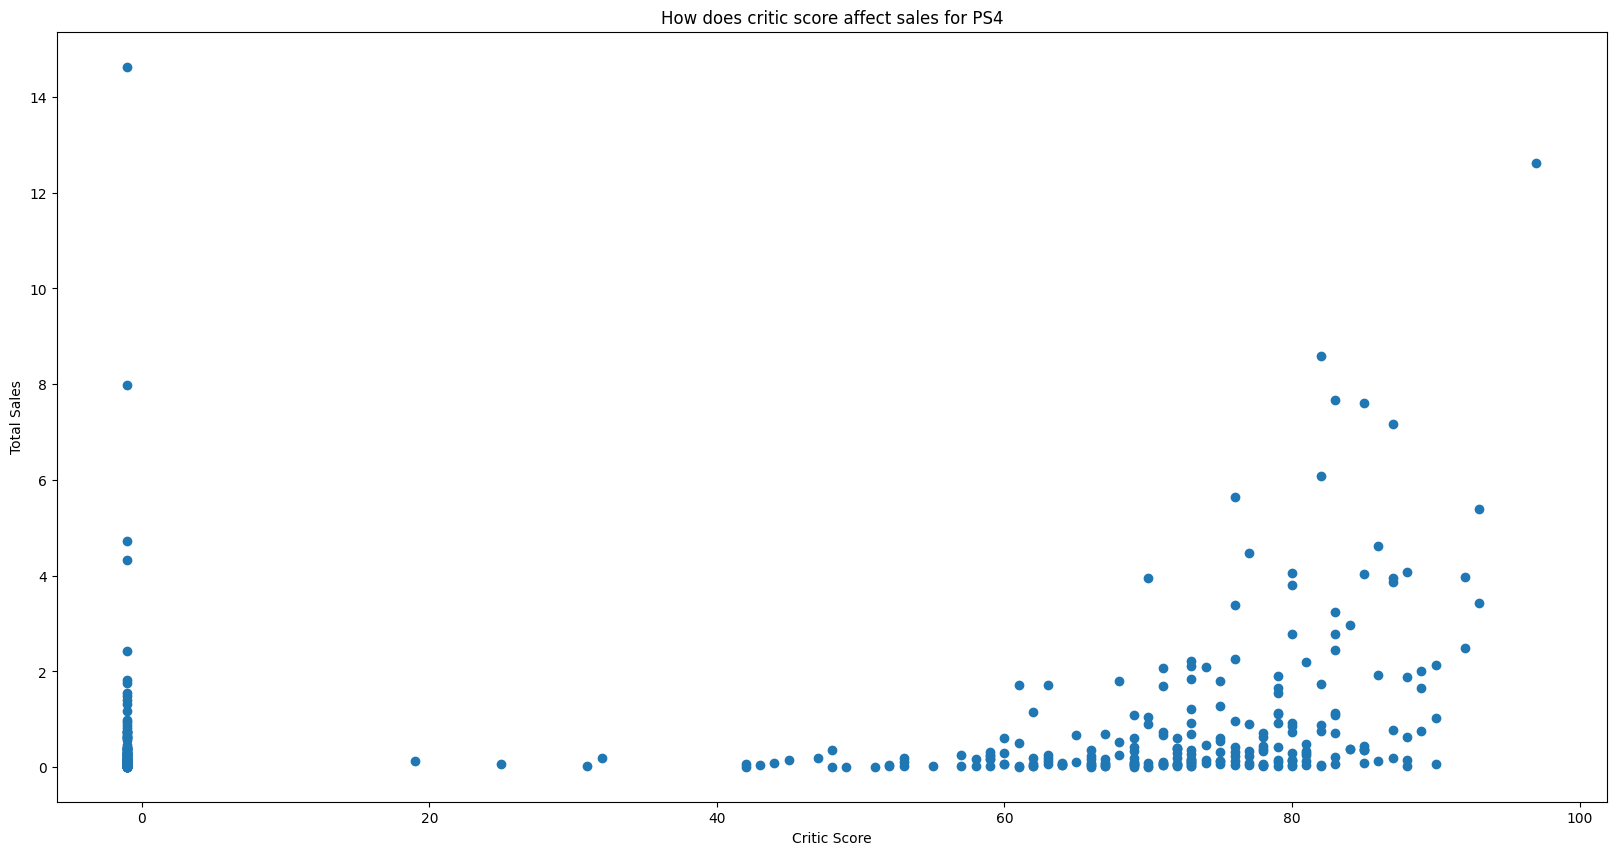

In [66]:
plt.scatter(ps4_sales['critic_score'],ps4_sales['total_sales'])
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.ylabel('Total Sales')
plt.xlabel('Critic Score')
plt.title('How does critic score affect sales for PS4')
plt.show()

<b>Observation</b>

Not filling in the missing values in critic score here helps to study whether having a critic score drives higher sales.

Having a critic score seem to drive higher sales for PS4. Based on the scatterplot, there were still sales for games missing critic score but scarce. the sales would be significantly fewer than if they were to have a critic score. 

Most sales are concentrated below 500k on the graph. For games with critic score 80 or above, the sales do not concentrate below 500k but it gets more dispersed. There are a few exceptions. Call of duty: black opts 3 has the highest sales but it does not have a critic score. Star Wars Battlefront (2015) rank 4th in total sales but it also does not have a critic score. However, if we look at the overall sales for all games, the chart suggests games with critic score help drive sales compares to the games that do not have a score. The higher the critic score seems to drive even higher sales.

In [67]:
ps4_sales_with_score = ps4_sales.query('critic_score != -1')

In [68]:
# calculating the correlation between sales and critic score for PS4
print(ps4_sales_with_score['total_sales'].corr(ps4_sales_with_score['critic_score']))

0.4026614106810408


There is a positive correlation between total sales and critic score. 

It means that the increase in critic score will also have a tendancy for total sales to increase for games on PS4. 

In [69]:
#Compare sales of Grand Theft Auto (same game) on different platform and see if critic score affect sales

gta=games[(games['name'].str.contains('Grand Theft Auto')) & (games['genre'] == 'Action')]
gta

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,decade
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M,10s
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,5.47,97.0,7.9,M,10s
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,1.17,96.0,7.9,M,10s


In [70]:
print(gta['total_sales'].corr(gta['critic_score']))

0.7860961068191766


There is a positive strong correlation between total sales and critic score for the same game on different platform. 
Therefore, at least for Grand Theft Auto V, the higher the critic score, the higher the tendancy for total sales to increase.

# How user score affect sales for PS4

In [74]:
ps4_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376 entries, 31 to 16585
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             376 non-null    object 
 1   platform         376 non-null    object 
 2   year_of_release  376 non-null    int32  
 3   genre            376 non-null    object 
 4   na_sales         376 non-null    float64
 5   eu_sales         376 non-null    float64
 6   jp_sales         376 non-null    float64
 7   other_sales      376 non-null    float64
 8   total_sales      376 non-null    float64
 9   critic_score     376 non-null    float64
 10  user_score       376 non-null    object 
 11  rating           376 non-null    object 
 12  decade           376 non-null    object 
dtypes: float64(6), int32(1), object(6)
memory usage: 39.7+ KB


In [75]:
ps4_user_score = ps4_sales.query('user_score != "-1"')

In [ ]:
ps4_user_score['user_score'] = ps4_user_score['user_score'].astype(float)

In [ ]:


plt.scatter(ps4_sales['user_score'],ps4_sales['total_sales'])
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.ylabel('Total Sales')
plt.xlabel('Critic Score')
plt.title('How does user score affect sales for PS4')
plt.show()

In [ ]:
print(ps4_sales['total_sales'].corr(ps4_user_score['user_score']))

There is a negative correlation between user score and total sales. This correlation suggests that user ratings have very little impact on game sales. It seems like critic scores play a more significant role in determining game sales.

# Games by genre

In [ ]:
sales_per_genre = games.pivot_table(index='genre',values='total_sales',aggfunc='sum')
sales_per_genre = sales_per_genre.sort_values('total_sales',ascending=False)
sales_per_genre

<b>Observation</b>

Action and shooter generate the most sales. Perhaps it is more exciting and can play in a groups. Puzzle and strategy generate the least sales. Perhaps they are more challenging not as exciting compare to action and shooter games.

# Region analysis 

# Top 5 platforms regional market share

In [ ]:
# Create a pivot table to get aggregate sales per platform per region
region_sales = games.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

# Create a new column, global sales, to get a total of all region sales and sort by global sales
region_sales['global_sales'] = region_sales.sum(axis=1)
region_sales = region_sales.sort_values(by='global_sales', ascending=False)

# To get the top 5 platform
region_sales = region_sales.head(5)
region_sales

In [ ]:
# To calculate the percentage of region per global sales
region_market_share = region_sales[['eu_sales','jp_sales','na_sales']].divide(region_sales['global_sales'], axis=0)*100
region_market_share

In [ ]:
#Creating a chart to show differnt region sales in terms of platform

games.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot(kind='bar',figsize=(20,10))
plt.title('Regional sales per genre', fontsize=20)
plt.ylabel('total sales_million USD', fontsize=15)
plt.xlabel('Rating',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<b>Observation</b>

It seems like different consoles dominate sales in different region. PS4 is most popular in Europe; Xbox One is most popular in North America while 3DS is more popular in Japan. 

If we look at the 5 platforms as a whole, it seems like Playstation is more popular in Europe. Europe generate highest sales for PS4 and PS3. North America generates over 60% of sales for Xbox One and X360.

Japan market is significantly way smaller for PS and Xbox consoles. However, this does not seem to be a fair comparison. EU consists of 20+ countries so does North America. Japan is just one country. It will be fair to compare Asia, EU and America rather than Japan alone I think. 

# Top 5 genre per region

In [ ]:
# Create a pivot table to get aggregate sales per genre per region
genre_region_sales = games.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

# Create a new column, global sales, to get a total of all region sales and sort by global sales
genre_region_sales['total_sales'] = genre_region_sales.sum(axis=1)
genre_region_sales = genre_region_sales.sort_values(by='total_sales', ascending=False)

# To get the top 5 platform
genre_region_sales = genre_region_sales.head(5)
genre_region_sales

In [ ]:
# To calculate the percentage of region per global sales
genre_region_market_share = genre_region_sales[['eu_sales','jp_sales','na_sales']].divide(genre_region_sales['total_sales'], axis=0)*100
genre_region_market_share

In [ ]:
#Creating a chart to show differnt region sales in terms of genre

games.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot(kind='bar',figsize=(20,10))
plt.title('Regional sales per genre', fontsize=20)
plt.ylabel('total sales_million USD', fontsize=15)
plt.xlabel('Rating',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<b>Observation</b>

In terms of genres, Europe and North America have similar market share in terms of sales. Japan has the least market share except role-playing. It seems that Japanese do not enjoy shooter and sports games as much as Americans or Europeans. 

# ESRB rating and sales per region

In [ ]:
# Create a pivot table to get aggregate sales per genre per region
esrb_region_sales = games.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

# Create a new column, global sales, to get a total of all region sales and sort by global sales
esrb_region_sales['total_sales'] = esrb_region_sales.sum(axis=1)
esrb_region_sales = esrb_region_sales.sort_values(by='total_sales', ascending=False)

# To get the top 5 platform
esrb_region_sales = esrb_region_sales.head(5)
esrb_region_sales

<b>Rating definitions:<b/>

E = everyone

E10+ = age 10 and up

Teen = age 13 and up

M = age 17 and up



In [ ]:
# To calculate the percentage of region per global sales
esrb_region_market_share = esrb_region_sales[['eu_sales','jp_sales','na_sales']].divide(esrb_region_sales['total_sales'], axis=0)*100
esrb_region_market_share

In [ ]:
#Creating a chart to show differnt region sales in terms of rating

games.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot(kind='bar', figsize=(20,10))
plt.title('ESRB rating and regional sales', fontsize=20)
plt.ylabel('total sales_million USD', fontsize=15)
plt.xlabel('Rating',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<b>Observation</b>

First of all, looking at games without rating, there is a pretty equal split in terms of sales across all three regions. 

However, for categories like M, E and teen, the ratings have a higher effect on sales for North America and Europe. M and E rating do not seem to have a high impact on sales in Japan. 

North America has over 50% global sales for E10+. It makes sense where parents may heavily rely on a game rating to decide whether they would want to purchase the game for their children.



# Test statistical hypotheses

I will choose 5% as the statistical significance level. Unlike space mission or drugs that requires extremely low probabilty of making error, marketing campaign for a gaming company should be able to use standard 5%.  

I will test 
1. average user ratings of the Xbox One and PC platforms are the same
2. average user ratings for the Action and Sports genres are different


# Hypothesis 1: user ratings of Xbox One and PC are different

null hypothesis - average user ratings of the Xbox One and PC platforms are the same

alternate hypothesis - average user ratings of the Xbox One and PC platforms are different

In [ ]:
games.info()

In [ ]:
# create datasets for user score for Xbox One. Will exclude games that do not have ratings and tbd

xbox_one_user = games.query('platform == "XOne" and user_score !="tbd"')

xbox_one_user['user_score'] = xbox_one_user['user_score'].astype(float)

xbox_one_user = xbox_one_user.query('user_score > 0 ')['user_score']

xbox_one_user

In [ ]:
# create datasets for user score for PC. Will exclude games that do not have ratings and tbd

pc_user = games.query('platform == "PC" and user_score !="tbd"')

pc_user['user_score'] = pc_user['user_score'].astype(float)

pc_user = pc_user.query('user_score > 0 ') ['user_score']

pc_user

In [ ]:

alpha = 0.05 # statistical significance level

results = st.ttest_ind(pc_user, xbox_one_user, equal_var = True) #test the hypothesis that the means of the two independent populations are equal

print(f'p-value {results.pvalue}')

In [ ]:
if results.pvalue < alpha: # compare the p-value with the significance level:
    print("We reject the null hypothesis that average user ratings of the Xbox One and PC platforms are the same")
else:
    print("We can't reject the null hypothesis that average user ratings of the Xbox One and PC platforms are the same")

# Hypothesis 2: average user ratings for the Action and Sports genres are different

null hypothesis - average user ratings for the Action and Sports genres are the same

alternate hypothesis - average user ratings for the Action and Sports genres are different

In [ ]:
# create datasets for user score for sport. Will exclude games that do not have ratings and tbd

sport_user = games.query('genre == "Sports" and user_score !="tbd"')

sport_user['user_score'] = sport_user['user_score'].astype(float)

sport_user = sport_user.query('user_score > 0 ')['user_score']

sport_user

In [ ]:
# create datasets for user score for action. Will exclude games that do not have ratings and tbd

action_user = games.query('genre == "Action" and user_score !="tbd"')

action_user['user_score'] = action_user['user_score'].astype(float)

action_user = action_user.query('user_score > 0 ')['user_score']

action_user

In [ ]:
alpha = 0.05 # statistical significance level

results = st.ttest_ind(sport_user, action_user, equal_var = True) #test the hypothesis that the means of the two independent populations are equal

print(f'p-value {results.pvalue}')

In [ ]:
if results.pvalue < alpha: # compare the p-value with the significance level:
    print("We reject the null hypothesis that average user ratings for the Action and Sports genres are the same")
else:
    print("We can't reject the null hypothesis that average user ratings for the Action and Sports genres are the same")

In [ ]:
sales_per_platform.sort_values(by='total',ascending=False)

# General conclusion

The goal of the project is to design the marketing campaign for 2017 based on historical data. 

After looking at the full historica data, around 60% of games were release in the 2000s and the top 5 platforms with highest sales are PS2, X360, PS3, Wii and DS. Most platforms will last for around 2 decades. For forecasting purposes, I took data from the last 3 years since 2016 to forecast next year's sales and marketing budget.

After filtering out the data, the most profitable platforms are:
- PS4
- Xbox One
- 3DS

Then we proceed to study whether `critic_score` affect PS4's sales. The data suggests that games sell better with a critic score vs no score. Games have higher sales too if critic score is above 80. There are also a few games where they have great sales despite not having a critic score.

Action and shooter games have the highest sales amongst all genres. North America have higher regional sales compares to Europe and Japan sales. North America sales are also driven by ESBR rating with E10+ rating having the highest sales. 

We then formed hypotheses to test if average user ratings are the same between Xbox One and PC platforms. Additionaly, we would like to test if average user ratings are the same between sports and action.

We have to reject the null hypothesis that the ratings are the same between Xbox One and PC. We fail to reject the average user ratings are the same between sports and action. Since sports and action are the most popular genres and with closer total sales, it can be reasonable that we cannot reject the null hypothesis.

PS4, 3DS and Xbox One launched in 2013 so they are still at the very early stage where they can have higher potential in generating sales. At least from the historical data shows that platforms sales normally last for 2 decades.

One thing to note is that sales are declining for all platforms. Cell phones are also getting more and more popular. Maybe mobile games are taking away some traditional consoles sales. 

To conclude, I think we should spend our marketing budget in North America with games that have E10+ rating on Xbox One and X360. Shooter and sports games are more popular in North America sales so I would push for advertisments on these 2 genres. 

For Europe, I would recommend spending money to advertise PS 3 and PS 4 on sports and shooter games. 

For Japan, we should spend on promoting games on 3DS for role playing games.